In [1]:
print("hello")

hello


Matplotlib is building the font cache; this may take a moment.


Stock Return (%) | Sharkfin Payout | Stock Payout
           -30 |          76.00 |        70.00
           -20 |         100.00 |        80.00
           -10 |         100.00 |        90.00
             0 |         100.00 |       100.00
            10 |         120.00 |       110.00
            20 |         120.00 |       120.00
            30 |         120.00 |       130.00
            40 |         120.00 |       140.00


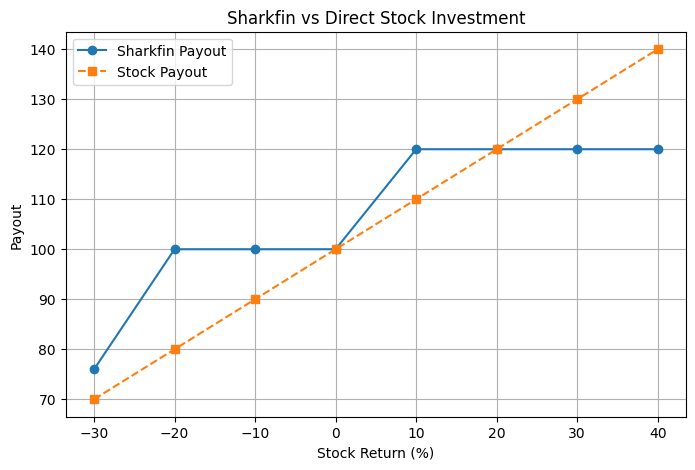

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sharkfin_pricing(initial_price=100, strike=100, ko=120, ki=80, ki_loss_factor=0.8, participation=2, scenarios=None):
    """
    Simulates Sharkfin product payout vs direct stock investment.
    
    Parameters:
    initial_price (float): Initial stock price
    strike (float): Strike price (typically 100%)
    ko (float): Knockout level
    ki (float): Knock-in level
    ki_loss_factor (float): % of loss investor bears after KI breach
    participation (float): Upside participation factor
    scenarios (list): Fixed stock return scenarios (in %), if None uses default.
    
    Returns:
    dict: Scenario-wise payout comparison (Sharkfin vs Stock)
    """
    
    if scenarios is None:
        scenarios = [-30, -20, -10, 0, 10, 20, 30, 40]  # Example return scenarios in %
    
    payouts = []
    
    for ret in scenarios:
        final_price = initial_price * (1 + ret / 100)
        
        # Direct stock investment payout
        stock_payout = final_price
        
        # Sharkfin payout logic
        if final_price >= ko * initial_price / 100:
            sharkfin_payout = ko * initial_price / 100  # KO locks max gain
        elif final_price >= strike * initial_price / 100:
            sharkfin_payout = initial_price + participation * (final_price - strike * initial_price / 100)
        elif final_price >= ki * initial_price / 100:
            sharkfin_payout = initial_price  # Capital protected if above KI
        else:
            sharkfin_payout = initial_price - (initial_price - final_price) * ki_loss_factor  # KI hit, loss applied
        
        payouts.append((ret, sharkfin_payout, stock_payout))
    
    return payouts

# Run the model
payouts = sharkfin_pricing()

# Print results
print("Stock Return (%) | Sharkfin Payout | Stock Payout")
for ret, sharkfin, stock in payouts:
    print(f"{ret:>14} | {sharkfin:>14.2f} | {stock:>12.2f}")

# Plot the results
returns = [p[0] for p in payouts]
sharkfin_values = [p[1] for p in payouts]
stock_values = [p[2] for p in payouts]

plt.figure(figsize=(8,5))
plt.plot(returns, sharkfin_values, label='Sharkfin Payout', marker='o')
plt.plot(returns, stock_values, label='Stock Payout', linestyle='dashed', marker='s')
plt.xlabel("Stock Return (%)")
plt.ylabel("Payout")
plt.title("Sharkfin vs Direct Stock Investment")
plt.legend()
plt.grid()
plt.show()
